In [52]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install seaborn



Note: you may need to restart the kernel to use updated packages.



### Importación e información del archivo

In [53]:

import pandas as pd

#La carga de esos archivos puede durar unos minutos
data1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
data = pd.concat([data1, data2])


In [54]:
# Chequear formato de fecha y hora
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Formar columnas de mes y año
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['Price'] = data['Price'].abs()

In [55]:
# dtypes of the columns
data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Month        1067371 non-null  int32         
 9   Year         1067371 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 81.4+ MB


,Quantity,InvoiceDate,Price,Customer ID,Month,Year
count,1.067371e+06,1067371,1.067371e+06,824364.000000,1.067371e+06,1.067371e+06
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.946709e+00,15324.638504,7.496765e+00,2.010426e+03
min,-8.099500e+04,2009-12-01 07:45:00,0.000000e+00,12346.000000,1.000000e+00,2.009000e+03
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000,5.000000e+00,2.010000e+03
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000,8.000000e+00,2.010000e+03
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000,1.100000e+01,2.011000e+03
max,8.099500e+04,2011-12-09 12:50:00,5.359436e+04,18287.000000,1.200000e+01,2.011000e+03
std,1.727058e+02,NaN,1.235415e+02,1697.464450,3.526416e+00,5.737608e-01


### País que más productos consume

In [56]:
# Consumos por países 
country_consumption = data.groupby('Country')['Quantity'].sum()
# País que más consume
max_consumption_country = country_consumption.idxmax()
print(f"El país que más productos consume es: {max_consumption_country}")
print("Consumo por países:")
print(country_consumption)


El país que más productos consume es: United Kingdom
Consumo por países:
Country
Australia                103706
Austria                   11306
Bahrain                    1275
Belgium                   35132
Bermuda                    2798
Brazil                      545
Canada                     3657
Channel Islands           20473
Cyprus                    10688
Czech Republic              592
Denmark                  235218
EIRE                     331341
European Community          497
Finland                   14317
France                   184952
Germany                  224581
Greece                     7707
Hong Kong                  7075
Iceland                    3286
Israel                     5485
Italy                     15309
Japan                     31822
Korea                       598
Lebanon                     457
Lithuania                  2958
Malta                      2491
Netherlands              381951
Nigeria                      56
Norway                 

### Top de ventas totales por producto

In [57]:
# Cambiar n para ver el top n de los productos más vendidos y con más ganancias
n = 5
# Ventas totales por producto
product_sales = data.groupby('StockCode')['Quantity'].sum()
# Top de n productos con más ventas
top_selling_products = product_sales.nlargest(n)
print("Productos más vendidos:")
print(top_selling_products)

print("********************************")

# Ganancias totales por producto
print("Productos con más ganancias:")
data['TotalRevenue'] = data['Price'] * data['Quantity']
product_revenue = data.groupby('StockCode')['TotalRevenue'].sum()
# Top de n productos que dejaron más ganancias
top_profitable_products = product_revenue.nlargest(n)

print(top_profitable_products)

Productos más vendidos:
StockCode
84077     108545
85123A     96066
85099B     95739
21212      95450
84879      80705
Name: Quantity, dtype: int64
********************************
Productos con más ganancias:
StockCode
22423     327813.65
DOT       322647.47
85123A    253720.02
85099B    181278.51
B         169738.20
Name: TotalRevenue, dtype: float64


#### Gráficas de productos más vendidos y con más ganancias

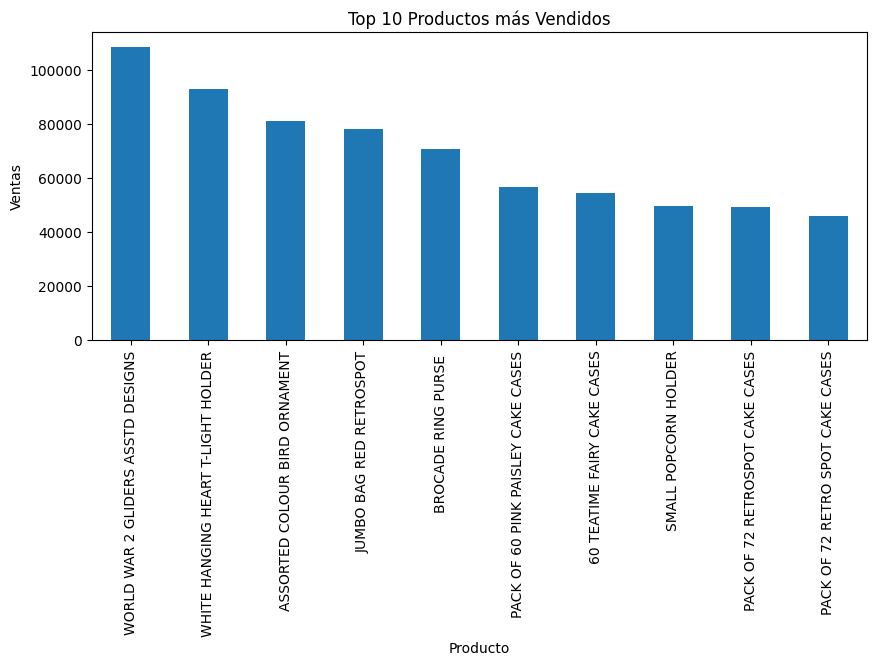

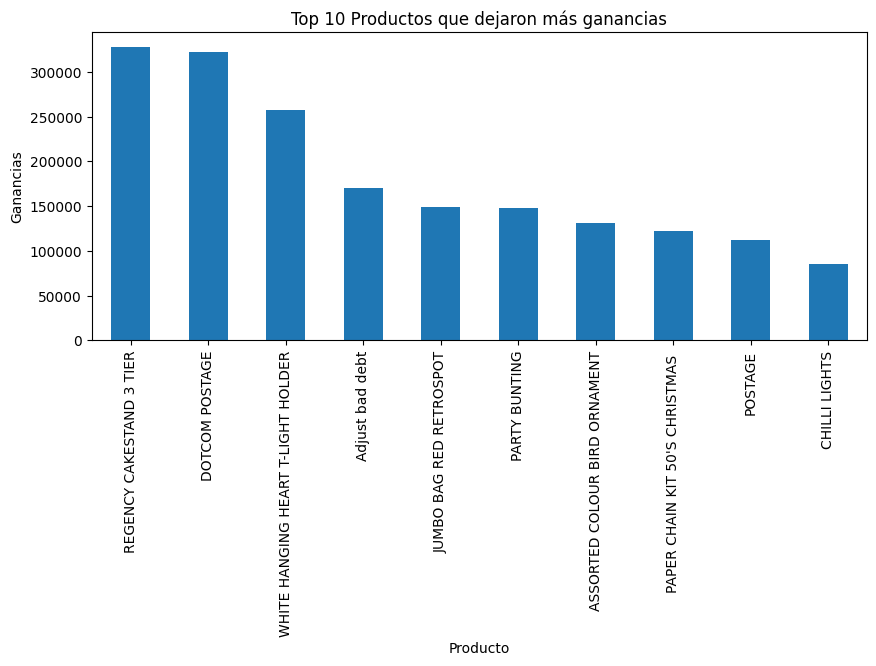

In [58]:
import matplotlib.pyplot as plt
n = 10
# Gráfica de 10 productos más vendidos
top_products = data.groupby('Description')['Quantity'].sum().nlargest(n)
top_products.plot(kind='bar', figsize=(10, 4))
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.title('Top 10 Productos más Vendidos')
plt.show()

# Top de n productos que dejaron más ganancias
top_profitable_products = data.groupby('Description')['TotalRevenue'].sum().nlargest(n)
top_profitable_products.plot(kind='bar', figsize=(10, 4))
plt.xlabel('Producto')
plt.ylabel('Ganancias')
plt.title('Top 10 Productos que dejaron más ganancias')
plt.show()


#### Análisis de gráficas
Se observa que el producto más vendido no es el que más ganancia deja. 
El segundo producto más vendido es el tercer producto que más dinero deja y el cuarto producto más vendido es el cuarto producto que más deja.

### Ventas por mes del año

In [59]:
monthly_sales = data.groupby(['Year', 'Month'])['Quantity'].sum()
print("Cantidad de productos vendidos por mes del año:")
print(monthly_sales)

Cantidad de productos vendidos por mes del año:
Year  Month
2009  12       420088
2010  1        375363
      2        368402
      3        489370
      4        351971
      5        364095
      6        388253
      7        302201
      8        451803
      9        478262
      10       601729
      11       673856
      12       508876
2011  1        308966
      2        277989
      3        351872
      4        289098
      5        380391
      6        341623
      7        391116
      8        406199
      9        549817
      10       570532
      11       740286
      12       226334
Name: Quantity, dtype: int64


#### Gráfica de las ventas por mes del año

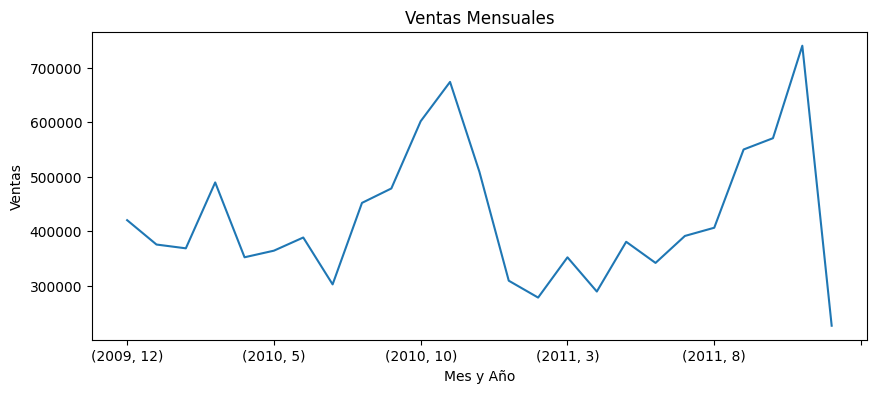

In [60]:
# Gráficas
import matplotlib.pyplot as plt

# Graficar las ventas mensuales
monthly_sales.plot(kind='line', figsize=(10, 4))
plt.xlabel('Mes y Año')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales')
plt.show()



#### Análisis de gráfica
Se evidencia picos considerables de ventas en noviembre tanto de 2010 como de 2011. También hay un pequeño pico en las ventas de marzo de 2010, el cual disminuyó para el mismo mes de año 2011. En julio de 2010 las ventas tuvieron su valor mínimo del año, y en febrero y abril las ventas tuvieron los valores más bajos durante el 2011. En 2009, 2010 y 2011 se observa una caída pronunciada en diciembre, que tanto en 2010 como en 2011 se mantiene durante los meses de enero y febrero.

### Análisis de correlación entre variables


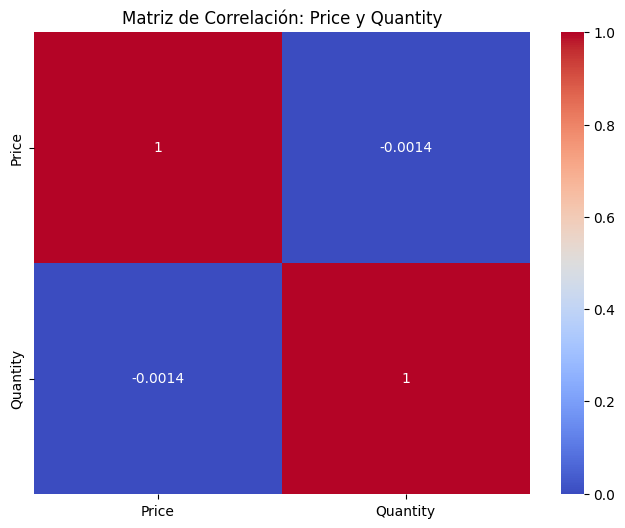

Coeficiente de correlación entre Price y Quantity: -0.0014434382482911919


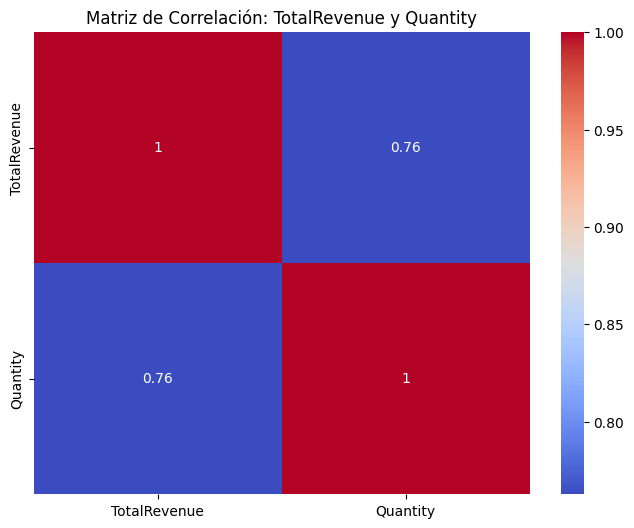

Coeficiente de correlación entre TotalRevenue y Quantity: 0.7626191380548816


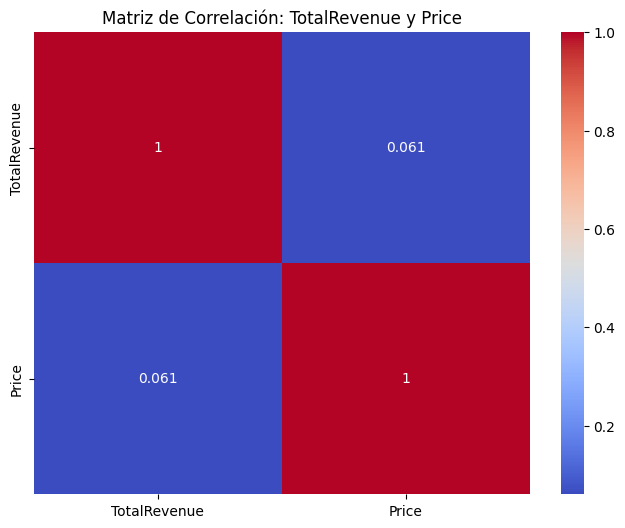

Coeficiente de correlación entre TotalRevenue y Price: 0.06084939199854007


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

price_quantity = ['Price', 'Quantity']
revenue_quantity = ['TotalRevenue', 'Quantity']
revenue_price = ['TotalRevenue', 'Price']


def correlation_matrix(interesting_variables):
    columns = data[interesting_variables]
    correlation_matrix = columns.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Matriz de Correlación: {interesting_variables[0]} y {interesting_variables[1]}')
    plt.show()

    # Coeficiente de correlación entre Precio y Cantidad
    correlation_coefficient = correlation_matrix.loc[interesting_variables[0], interesting_variables[1]]
    print(f"Coeficiente de correlación entre {interesting_variables[0]} y {interesting_variables[1]}: {correlation_coefficient}")

correlation_matrix(price_quantity)
correlation_matrix(revenue_quantity)
correlation_matrix(revenue_price)


#### Análisis de correlación
- La correlación entre el precio y la cantidad, con un coeficiente de relación de -0.0013 es prácticamente nula. No hay relación lineal considerable entre las variables.
- La correlación entre ganancias totales y cantidad de productos vendida es mucho mayor que la correlación entre ganancias totales y precio del producto. Se debe priorizar la búsqueda de estrategias para aumentar las ventas (cantidad de productos vendidos) en vez de aumentar el precio de los productos con tal de obtener más ganancias.